# 장소 크롤링하기

In [ ]:
import requests
from bs4 import BeautifulSoup

def get_instagram_location_count(location):
    base_url = "https://www.instagram.com/explore/locations/"
    search_url = base_url + "?q=" + location
    response = requests.get(search_url)
    soup = BeautifulSoup(response.text, 'html.parser')
    location_count = soup.find('span', {'class': '._8gpiy'}).text
    return location_count

location = input("검색할 장소를 입력하세요: ")
result = get_instagram_location_count(location)
print(f"{location} 검색 결과 개수: {result}")

In [1]:
pip install requests

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: requests in c:\users\user\appdata\local\programs\python\python311\lib\site-packages (2.31.0)




[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install selenium

     --------------------------------------- 10.5/10.5 MB 32.8 MB/s eta 0:00:00
     ------------------------------------- 467.2/467.2 kB 28.6 MB/s eta 0:00:00
     ---------------------------------------- 60.8/60.8 kB 3.2 MB/s eta 0:00:00
     ------------------------------------- 181.5/181.5 kB 11.4 MB/s eta 0:00:00
  Using cached wsproto-1.2.0-py3-none-any.whl (24 kB)
     -------------------------------------- 118.7/118.7 kB 6.8 MB/s eta 0:00:00
  Using cached h11-0.14.0-py3-none-any.whl (58 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


더보기 버튼
더보기 버튼
더보기 버튼
더보기 버튼
더보기 버튼
더보기 버튼
더보기 버튼
더보기 버튼
더보기 버튼
더보기 버튼
더 보기 버튼이 없거나 클릭할 수 없습니다.
<html class="_9dls js-focus-visible _aa4c" data-js-focus-visible="" dir="ltr" lang="ko"><head><link data-default-icon="https://static.cdninstagram.com/rsrc.php/v3/yI/r/VsNE-OHk_8a.png" href="https://static.cdninstagram.com/rsrc.php/v3/yI/r/VsNE-OHk_8a.png" rel="icon" sizes="192x192"/><meta content="noarchive, noimageindex" name="robots"/><meta charset="utf-8"/><meta content="default" name="apple-mobile-web-app-status-bar-style"/><meta content="yes" name="mobile-web-app-capable"/><meta content="width=device-width, initial-scale=1, minimum-scale=1, maximum-scale=2, viewport-fit=cover" id="viewport" name="viewport"/><meta content="#FFFFFF" name="theme-color"/><link href="https://static.cdninstagram.com/rsrc.php/v3/yR/r/lam-fZmwmvn.png" rel="apple-touch-icon" sizes="76x76"/><link href="https://static.cdninstagram.com/rsrc.php/v3/ys/r/aM-g435MtEX.png" rel="apple-touch-icon" sizes="120x120"/><link 
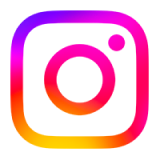
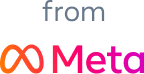

In [2]:
import requests
from bs4 import BeautifulSoup
import selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time



search_url = 'https://www.instagram.com/explore/locations/c1280954/seoul-south-korea/'

# 셀레니움을 사용하여 Chrome 브라우저 열기
driver = webdriver.Chrome()
driver.get(search_url)
time.sleep(5)




# 페이지 스크롤
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")


# 더 보기 버튼 클릭
while True:
    
    
    try:
        # 더 보기 버튼이 나타날 때까지 대기
        more_button = WebDriverWait(driver, 3).until(
            
            
            EC.presence_of_element_located((By.CSS_SELECTOR, 'div._ajkl > [role="link"]'))

        )
        more_button.click()
        print("더보기 버튼")
    except:
        print("더 보기 버튼이 없거나 클릭할 수 없습니다.")
        break
    
    finally:
        # 페이지 스크롤
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        # 잠시 대기
        time.sleep(3)


# 현재 페이지 소스 가져오기
page_source = driver.page_source
soup = BeautifulSoup(page_source, 'html.parser')
# 페이지 소스에서 원하는 정보 추출 및 처리

# 작업이 끝나면 드라이버 종료
driver.quit()


print(soup)

In [3]:
elements = soup.find_all('li', class_='_ae5i')
print(len(elements))
hrefs = []
texts = []

for element in elements:
    a_tag = element.find('a')
    if a_tag:
        href_value = a_tag['href']
        text_value = a_tag.text
        hrefs.append(href_value)
        texts.append(text_value)
        
print (len(hrefs))   
print (len(texts)) 

1903
1903
1903


In [4]:
texts [-10:]

['논현동',
 '병철이네쪽갈비',
 '더 부띠끄 강남점',
 '장생건강원bar',
 '헬카페',
 'Botanique 보타니크',
 '청담 고수',
 '달맞이',
 'Starship Entertainment',
 'Cheongdam dong, Gangnam gu - Seoul']

In [5]:
import pandas as pd

location_list = pd.DataFrame({'href': hrefs, 'text': texts})

In [6]:
location_list['href']

0               /explore/locations/213094191/seoul-korea/
1              /explore/locations/3206066/cheongdam-dong/
2                           /explore/locations/244263804/
3       /explore/locations/576979760/garosu-gil-gangna...
4       /explore/locations/788981747/gangnam-seoul-korea/
                              ...                        
1898       /explore/locations/1785356555034242/botanique/
1899                  /explore/locations/332081117342657/
1900                  /explore/locations/103703691443942/
1901    /explore/locations/381838600/starship-entertai...
1902    /explore/locations/249792835/cheongdam-dong-ga...
Name: href, Length: 1903, dtype: object

In [7]:
location_list ['palce_id'] = location_list['href'].apply(lambda x : int(x.strip().split('/')[3]))

In [ ]:
# 장소 이름으로 검색하여 장소 정보 가져오기
# 인스타그램 계정 정보
username = "maximum_hyunni"
password = "Chlthgus98!"
from instagrapi import Client
# 인스타그램 클라이언트 초기화
client = Client()
client.login(username, password)


In [17]:


names = []
websites = []
categories = []
addresses = []
import json
errors = []
end = len(location_list ['palce_id'])
cnt = 0 

while cnt < end:
    i = location_list ['palce_id'][cnt]
    try :
        place_info =  client.location_info(i)
        print(place_info)
        names.append(place_info.name )
        websites.append(place_info.website )
        categories.append(place_info.category )
        addresses.append(place_info.address )
        
    except json.JSONDecodeError as e:
        print('json error')
        print(e)
        errors.append(cnt)
    except Exception as e:
        names.append('error' )
        websites.append('error')
        categories.append('error')
        websites.append('error')
        addresses.append('error')
        errors.append(cnt)
        print(e)
        
        time.sleep(2)
        cnt -=1
        
    finally :
        print(len(names), cnt)
        print (errors)
        print ('----------------')
    cnt += 1
        



feedback_required: We limit how often you can do certain things on Instagram to protect our community. Tell us if you think we made a mistake.
1 -1
[0]
----------------
feedback_required: We limit how often you can do certain things on Instagram to protect our community. Tell us if you think we made a mistake.
2 -1
[0, 0]
----------------
2 0
[0, 0]
----------------


KeyboardInterrupt: 

In [16]:
print(websites)

['http://www.seoul.go.kr', '', 'http://cheongdam.gangnam.go.kr', '', 'https://hangang.seoul.go.kr/archives/46727', '서초구 신반포로11길 40', None, '서울특별시 강남구 신사동', 'http://grandstage.co.kr/', '', None, ' 강남구 압구정동 ', 'http://ehbook.co.kr/', '', None, '', None, '강남구 역삼동', 'http://hangang.seoul.go.kr/park_jam/', '서초구 잠원로 26-10', None, '', None, '', 'https://www.marriott.com/hotels/travel/seljw-jw-marriott-hotel-seoul/?scid=5d6c9ba8-fdb3-45cd-90d4-fc3cbfe3681c&y_source=1_MzgxMzkwNS01NTktbG9jYXRpb24ud2Vic2l0ZQ%3D%3D', '176, Sinbanpo-ro, Seocho-gu', None, '', 'https://www.instagram.com/nu_dake/', '50, Apgujeong-ro 46-gil, Gangnam-gu, Seoul', None, '', None, '', 'http://www.gangnam.go.kr/dong/main/main.do?dongcode=401601', '', 'http://www.bluesquare.kr/', '블루스퀘어', 'http://www.yongsan.go.kr/site/dc/index01.jsp?sitecdv=s0000468', '', 'http://english.visitkorea.or.kr/enu/si/si_en_3_1_1_1.jsp?cid=1011983', '', 'http://hangang.seoul.go.kr/park_banpo/index.html', '반포대교', None, '', 'http://store.linefriends

In [47]:
medias = client.location_medias_recent(3206066)
print(len(medias))

Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/explore/locations/3206066/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/explore/locations/3206066/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/explore/locations/3206066/?__a=1&__d=dis) >>> 


60


medias[0].dict()

In [ ]:
import os
from time import sleep
import time
import re
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.common.exceptions import ElementNotInteractableException
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.common.keys import Keys

##########################################################################
##################### variable related selenium ##########################
##########################################################################
# 서울 특별시 구 리스트
gu_list = ['마포구','서대문구','은평구','종로구','중구','용산구','성동구','광진구',
           '동대문구','성북구','강북구','도봉구','노원구','중랑구','강동구','송파구',
           '강남구','서초구','관악구','동작구','영등포구','금천구','구로구','양천구','강서구']


# csv 파일에 헤더 만들어 주기
for index, gu_name in enumerate(gu_list):
    fileName = 'test.csv' # index.__str__() + '_' + gu_name + '.'+'csv'
    file = open(fileName, 'w', encoding='utf-8')
    file.write("카페명" + "|" + "주소" + "|" + "영업시간" + "|" + "전화번호" + "|" + "대표사진주소" + "\n")
    file.close()                                    # 처음에 csv파일에 칼럼명 만들어주기
    
    options = webdriver.ChromeOptions()
    # options.add_argument('headless')
    options.add_argument("Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.198 Safari/537.36   ")
    options.add_argument('lang=ko_KR')
    chromedriver_path = "D:\workspace\pythonProject2\chromedriver.exe"
    driver = webdriver.Chrome(os.path.join(os.getcwd(), chromedriver_path), options=options)  # chromedriver 열기
    driver.get('https://map.kakao.com/')  # 주소 가져오기
    search_area = driver.find_element_by_xpath('//*[@id="search.keyword.query"]') # 검색 창
    search_area.send_keys(gu_name + ' 카페')  # 검색어 입력
    driver.find_element_by_xpath('//*[@id="search.keyword.submit"]').send_keys(Keys.ENTER)  # Enter로 검색
    driver.implicitly_wait(3) # 기다려 주자
    more_page = driver.find_element_by_id("info.search.place.more")
    # more_page.click()
    more_page.send_keys(Keys.ENTER) # 더보기 누르고
    # 첫 번째 검색 페이지 끝
    # driver.implicitly_wait(5) # 기다려 주자
    time.sleep(1)

    # next 사용 가능?
    next_btn = driver.find_element_by_id("info.search.page.next")
    has_next = "disabled" not in next_btn.get_attribute("class").split(" ")
    Page = 1
    while has_next: # 다음 페이지가 있으면 loop
    # for i in range(2, 6): # 2, 3, 4, 5
        file = open(fileName, 'a', encoding='utf-8')
        time.sleep(1)
        # place_lists = driver.find_elements_by_css_selector('#info\.search\.place\.list > li:nth-child(1)')
        # 페이지 루프
        #info\.search\.page\.no1 ~ .no5
        page_links = driver.find_elements_by_css_selector("#info\.search\.page a")
        pages = [link for link in page_links if "HIDDEN" not in link.get_attribute("class").split(" ")]
        # print(len(pages), "개의 페이지 있음")
        # pages를 하나씩 클릭하면서
        for i in range(1, 6):
            xPath = '//*[@id="info.search.page.no' + str(i) + '"]'
            try:
                page = driver.find_element_by_xpath(xPath)
                page.send_keys(Keys.ENTER)
            except ElementNotInteractableException:
                print('End of Page')
                break;
            sleep(3)
            place_lists = driver.find_elements_by_css_selector('#info\.search\.place\.list > li')
            for p in place_lists: # WebElement
                # print(p.get_attribute('innerHTML'))
                # print("type of p:", type(p))
                store_html = p.get_attribute('innerHTML')
                store_info = BeautifulSoup(store_html, "html.parser")
                # BS -> 분석
                #
                place_name = store_info.select('.head_item > .tit_name > .link_name')
                # place_address = store_info.select('.info_item > .addr > p')
                # place_hour = store_info.select('.info_item > .openhour > p > a')
                # place_tel = store_info.select('.info_item > .contact > span')
                 # print("length:", len(place_name))
                if len(place_name) == 0:
                    continue # 광고
                place_name = store_info.select('.head_item > .tit_name > .link_name')[0].text
                place_address = store_info.select('.info_item > .addr > p')[0].text
                place_hour = store_info.select('.info_item > .openhour > p > a')[0].text
                place_tel = store_info.select('.info_item > .contact > span')[0].text


                # 사진url 수집
                detail = p.find_element_by_css_selector('div.info_item > div.contact > a.moreview')
                detail.send_keys(Keys.ENTER)

                driver.switch_to.window(driver.window_handles[-1])

                place_photo = ""
                try:
                    photo = driver.find_element_by_css_selector('span.bg_present')
                    photo_url = photo.get_attribute('style')
                    m = re.search('"(.+?)"', photo_url)
                    if m:
                        place_photo = m.group(1)
                    else:
                        place_photo = ""
                except:
                    place_photo = ""
                driver.close()
                driver.switch_to.window(driver.window_handles[0])
                print(place_name, place_photo)

                file.write(place_name + "|" + place_address + "|" + place_hour + "|" + place_tel + "|" + place_photo + "\n")
            print(i, ' of', ' [ ' , Page, ' ] ')
        next_btn = driver.find_element_by_id("info.search.page.next")
        has_next = "disabled" not in next_btn.get_attribute("class").split(" ")
        if not has_next:
            print('Arrow is Disabled')
            driver.close()
            file.close()
            break # 다음 페이지 없으니까 종료
        else: # 다음 페이지 있으면
            Page += 1
            next_btn.send_keys(Keys.ENTER)
    print("End of Crawl")


In [48]:
medias[0].dict()

{'pk': 3334419551582288964,
 'id': '3334419551582288964_2242259649',
 'code': 'C5GPOpoLfxE',
 'taken_at': datetime.datetime(2024, 3, 29, 12, 3, 27, tzinfo=TzInfo(UTC)),
 'media_type': 8,
 'image_versions2': {'candidates': [{'width': 1080,
    'height': 1080,
    'url': 'https://scontent-ssn1-1.cdninstagram.com/v/t51.29350-15/434618196_344819218604021_3549226922534294879_n.jpg?stp=dst-jpg_e35_s1080x1080&_nc_ht=scontent-ssn1-1.cdninstagram.com&_nc_cat=105&_nc_ohc=HAIUIuAyj94AX81RshC&edm=AKmAybEBAAAA&ccb=7-5&ig_cache_key=MzMzNDQxOTU0MzcyMjA2MTE4MA%3D%3D.2-ccb7-5&oh=00_AfC89myUDdXLvoqnW8_OHJlYX59SVBQAb-1ryaWKa6o-PQ&oe=660B28B9&_nc_sid=99328a',
    'scans_profile': ''},
   {'width': 320,
    'height': 320,
    'url': 'https://scontent-ssn1-1.cdninstagram.com/v/t51.29350-15/434618196_344819218604021_3549226922534294879_n.jpg?stp=dst-jpg_e35_s320x320&_nc_ht=scontent-ssn1-1.cdninstagram.com&_nc_cat=105&_nc_ohc=HAIUIuAyj94AX81RshC&edm=AKmAybEBAAAA&ccb=7-5&ig_cache_key=MzMzNDQxOTU0MzcyMjA2MTE4MA